<a href="https://colab.research.google.com/github/Devan5622/Devan5622/blob/main/inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
 
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

 
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Alzheimer-Dataset/train'
valid_path = '/content/drive/MyDrive/Alzheimer-Dataset/test'


In [3]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Alzheimer-Dataset/train/*')

# our layers - you can add more if you want
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

In [4]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)




In [5]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer-Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size =25,
                                                 class_mode = 'categorical')



Found 5121 images belonging to 4 classes.


In [7]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer-Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 25,
                                            class_mode = 'categorical')

Found 1279 images belonging to 4 classes.


In [9]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
205/205 [==============================] - 1282s 6s/step - loss: 2.4489 - accuracy: 0.5692 - val_loss: 2.3025 - val_accuracy: 0.5160
Epoch 2/50
205/205 [==============================] - 88s 430ms/step - loss: 2.4217 - accuracy: 0.6038 - val_loss: 2.8615 - val_accuracy: 0.4511
Epoch 3/50
205/205 [==============================] - 87s 423ms/step - loss: 2.0410 - accuracy: 0.6415 - val_loss: 3.1996 - val_accuracy: 0.5403
Epoch 4/50
205/205 [==============================] - 88s 426ms/step - loss: 2.0057 - accuracy: 0.6514 - val_loss: 6.7703 - val_accuracy: 0.5293
Epoch 5/50
205/205 [==============================] - 87s 423ms/step - loss: 2.2078 - accuracy: 0.6563 - val_loss: 3.7497 - val_accuracy: 0.5231
Epoch 6/50
205/205 [==============================] - 86s 418ms/step - loss: 2.1750 - accuracy: 0.6696 - val_loss: 6.2916 - val_accuracy: 0.4081
Epoch 7/50
205/205 [==============================] - 87s 424ms/step - loss: 1.9238 - accuracy: 0.6833 - val_loss: 3.5907 - val_acc

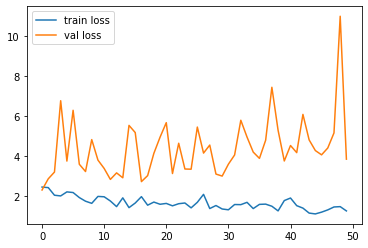

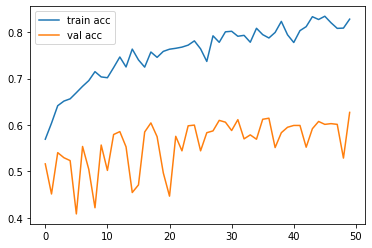

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')